# Métodos de detección de valores atípicos

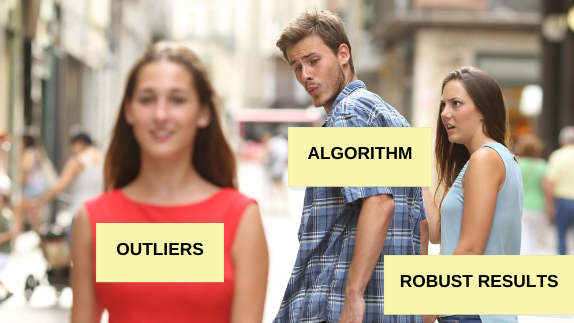

# Introducción

Incluir valores atípicos en modelos basados en datos puede ser riesgoso. La existencia de un solo valor extremo engañoso tiene el potencial de cambiar la conclusión que implica el modelo. Por lo tanto, es importante gestionar ese tipo de riesgo.

Este estudio **explica** seis de los métodos de **detección de valores atípicos** más populares:
* Método IQR de Tukey
* Método de desviación estándar
* Método de puntuación Z
* Puntuación Z modificada
* Isolation Forest
* DBSCAN - Agrupamiento espacial basado en densidad con ruido

El objetivo de este estudio es presentar algunos métodos útiles para detectar y eliminar los valores atípicos en un conjunto de datos. Algunos de ellos son sensibles a valores extremos como el método de desviación estándar, y otros son resistentes a valores extremos, como el método de Tukey.

## Tabla de Contenidos
* 1. Configuración
    * 1.1 Importar bibliotecas
    * 1.2 Importar datos
    * 1.3 Definir lista de características
    * 1.4 Algunas visualizaciones
* 2. Método IQR de Tukey
* 3. Método de desviación estándar
* 4. Método de puntuación Z
* 5. Puntuación Z modificada
* 6. Isolation Forest
* 7. DBSCAN - Agrupamiento espacial basado en densidad con ruido

# 1. Configuración

### 1.1 Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

### 1.2 Importar datos

In [2]:
df_raw = pd.read_csv('Data/creditcard.csv')
df=df_raw.drop(['Time'], axis=1)

### 1.3 Definir lista de características

In [3]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

### 1.4 Algunas visualizaciones

In [31]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
axes[0,0].set_title("V17 distribution");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', palette='Spectral')
axes[0,1].set_title("V10 distribution");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
axes[0,2].set_title("V12 distribution");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V16', palette='Spectral')
axes[1,0].set_title("V16 distribution");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V14', palette='Spectral')
axes[1,1].set_title("V14 distribution");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V3', palette='Spectral')
axes[1,2].set_title("V3 distribution");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='Spectral')
axes[2,0].set_title("V7 distribution");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V11', palette='Spectral')
axes[2,1].set_title("V11 distribution");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V4', palette='Spectral')
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

C:\Users\uie70742\AppData\Local\Temp\ipykernel_33236\1637867998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', palette='Spectral')
C:\Users\uie70742\AppData\Local\Temp\ipykernel_33236\1637867998.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', palette='Spectral')
C:\Users\uie70742\AppData\Local\Temp\ipykernel_33236\1637867998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', palette='Spectral')
C:\Use

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

# 2. Método IQR de Tukey

La técnica de Tukey (1977) se utiliza para detectar valores atípicos en **datos sesgados o no con forma de campana** ya que no hace suposiciones de distribución. Sin embargo, el método de Tukey puede no ser apropiado para muestras pequeñas. La regla general es que cualquier cosa fuera del rango (Q1 - 1.5 IQR) y (Q3 + 1.5 IQR) es un valor atípico y puede eliminarse.

El rango intercuartílico (IQR) es uno de los procedimientos más utilizados para la detección y eliminación de valores atípicos.

Procedimiento:
1. Encontrar el primer cuartil, Q1.
2. Encontrar el tercer cuartil, Q3.
3. Calcular el IQR. IQR = Q3-Q1.
4. Definir el rango de datos normales con el límite inferior como Q1–1.5 IQR y el límite superior como Q3+1.5 IQR.

Cualquier punto de datos fuera de este rango se considera un valor atípico y debe eliminarse para análisis posteriores.

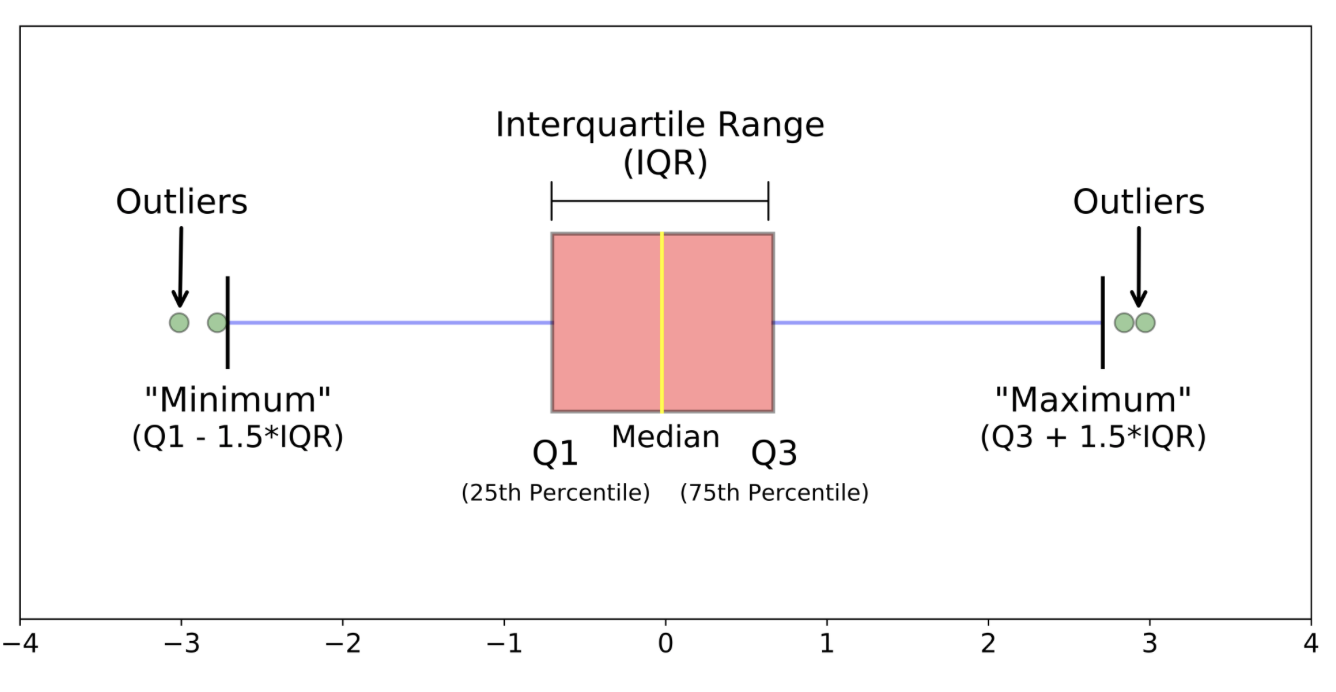

In [8]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [9]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,feature_list)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 31904


In [10]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using IQR Method\n', size = 18)

axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

# 3. Método de desviación estándar

Si sabemos que la distribución de los valores en la muestra es gaussiana o similar a la gaussiana, podemos usar la desviación estándar de la muestra como un límite para identificar valores atípicos.

La desviación estándar muestra cuánto se dispersan los puntos de datos individuales respecto a la media. Si la distribución de los datos es normal entonces:
* El 68% de los valores de los datos se encuentran dentro de una desviación estándar de la media
* El 95% están dentro de dos desviaciones estándar
* El 99.7% se encuentran dentro de tres desviaciones estándar.

Dependiendo de la especificación establecida, ya sea a 2 o 3 veces la desviación estándar, podemos detectar y eliminar valores atípicos del conjunto de datos.

Este método puede fallar en la detección de valores atípicos porque los valores atípicos aumentan la desviación estándar. Cuanto más extremo sea el valor atípico, más se ve afectada la desviación estándar.

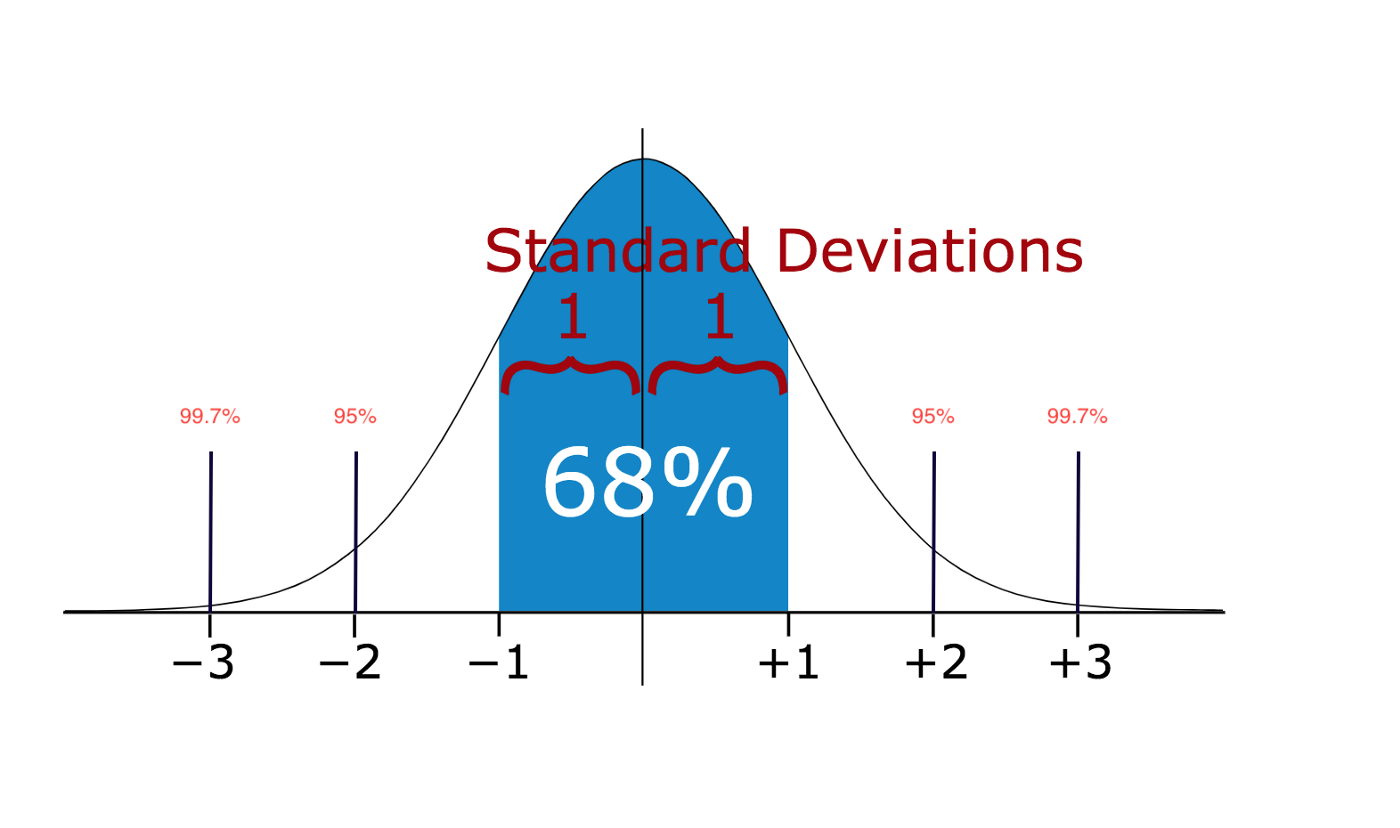

In [11]:
def StDev_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the standard deviation method.
    """
    outlier_indices = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        
        # calculate the cutoff value
        cut_off = data_std * 3
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_indices.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    print('Total number of outliers is:', df1.shape[0]+ df2.shape[0])
    
    return multiple_outliers   

# detecting outliers
Outliers_StDev = StDev_method(df,1,feature_list)

# dropping outliers
df_out2 = df.drop(Outliers_StDev, axis = 0).reset_index(drop=True)

Total number of outliers is: 4076


In [12]:
data_mean, data_std = df['V11'].mean(), df['V11'].std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

plt.figure(figsize = (10,5))
sns.histplot(x = 'V11', data=df, bins=70)
plt.axvspan(xmin = lower,xmax= df.V11.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.V11.max(),alpha=0.2, color='red')

The lower bound value is: -3.0621390831346553
The upper bound value is: 3.062139083134659


In [13]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using Standard Deviation Method\n', size = 18)


axes[0,0].hist(df_out2['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out2['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out2['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out2['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out2['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out2['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out2['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out2['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out2['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

# 4. Método de puntuación Z

Al calcular la puntuación Z, reescalamos y centramos los datos y buscamos puntos de datos que estén demasiado lejos de cero. La puntuación Z se utiliza para convertir los datos en otro conjunto con media = 0.

La puntuación Z describe la posición de un valor bruto en términos de su distancia respecto a la media, medida en unidades de desviación estándar.

Esta técnica asume una **distribución gaussiana** de los datos. Los valores atípicos son los puntos de datos que están en las colas de la distribución.

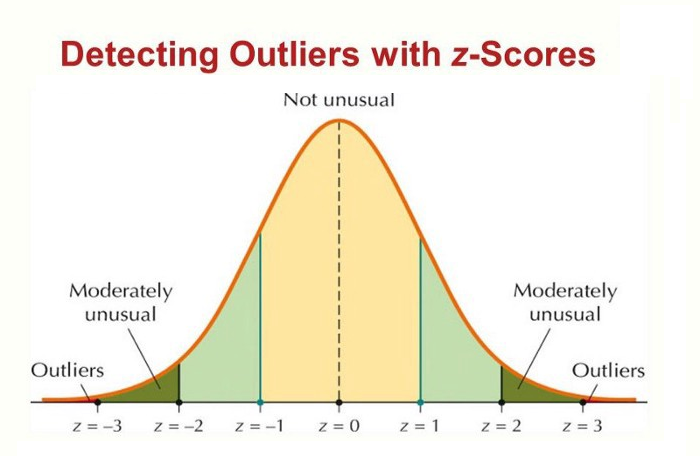

In [14]:
def z_score_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers

In [15]:
# detecting outliers
Outliers_z_score = z_score_method(df,1,feature_list)

# dropping outliers
df_out3 = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 4076


In [16]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_out3['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out3['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out3['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out3['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out3['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out3['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out3['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out3['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out3['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

# 5. Puntuación Z modificada

Las puntuaciones Z pueden verse afectadas por valores de datos inusualmente grandes o pequeños. Si hay un valor extremo, la puntuación Z correspondiente a ese punto también será extrema, por lo que una forma más robusta de detectar valores atípicos es usar una puntuación Z modificada.

Tiene el potencial de mover significativamente la media de su valor real. La puntuación Z modificada se calcula como:

Puntuación Z modificada = 0.6745(xi – x̃) / MAD

donde:

* xi: Un valor de dato individual
* x̃: La mediana del conjunto de datos
* MAD: La desviación absoluta mediana del conjunto de datos

La desviación absoluta mediana (MAD) es una estadística robusta de variabilidad que mide la dispersión de un conjunto de datos. Es menos afectada por valores atípicos que otras medidas de dispersión como la desviación estándar y la varianza. Si tus datos son normales, la desviación estándar suele ser la mejor opción para evaluar la dispersión. Sin embargo, si tus datos no son normales, el MAD es una estadística que puedes usar en su lugar.

MAD = mediana(|xi – xm|)

donde:
* xi: El i-ésimo valor en el conjunto de datos
* xm: El valor mediano en el conjunto de datos

### Nota importante

Para calcular el MAD puedes usar:
* scipy.stats
* statsmodels
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_abs_deviation.html
https://www.statsmodels.org/dev/generated/statsmodels.robust.scale.mad.html

La fórmula de scipy.stats no necesita ningún cambio en los parámetros.

La fórmula de statsmodels (statsmodels.robust.scale.mad) calcula una estimación robusta de la desviación estándar asumiendo una distribución normal escalando el resultado por un factor de aproximadamente 0.67.

Para evitar usar este factor de escala debemos establecer c = 1 así: robust.mad(data, c=1)

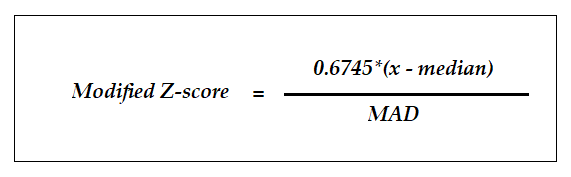

In [17]:
from scipy.stats import median_abs_deviation

def z_scoremod_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score modified method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        MAD = median_abs_deviation
        
        mod_z_score = abs(0.6745*(df[column] - data_mean)/MAD(df[column]) )
                
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[mod_z_score >threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[mod_z_score >threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers

In [18]:
# detecting outliers
Outliers_z_score = z_scoremod_method(df,1,feature_list)

# dropping outliers
df_out4 = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 33055


In [19]:
# Checking distributions of most important features after dropping outliers



# 6. Isolation Forest

Isolation Forest (IF) es similar a Random Forest y se basa en árboles de decisión. No hay etiquetas predefinidas aquí. Es un algoritmo de aprendizaje no supervisado que identifica anomalías aislando valores atípicos en los datos.

El algoritmo Isolation Forest (iForest) fue propuesto inicialmente por Fei Tony Liu, Kai Ming Ting y Zhi-Hua Zhou en 2008. Los autores aprovecharon dos propiedades cuantitativas de los puntos de datos anómalos en una muestra:

1. Pocos - son la minoría que consiste en menos instancias y
2. Diferentes - tienen valores de atributos que son muy diferentes de los de las instancias normales

Dado que el algoritmo Isolation Forest se basa en el principio de que las anomalías son observaciones que son pocas y diferentes, esto debería hacerlas más fáciles de identificar.

Isolation Forest no asume distribución normal y es capaz de detectar valores atípicos a nivel multidimensional. Isolation Forest es computacionalmente eficiente: el algoritmo tiene una complejidad de tiempo lineal con una constante baja y un bajo requerimiento de memoria. Por lo tanto, escala bien a conjuntos de datos grandes.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

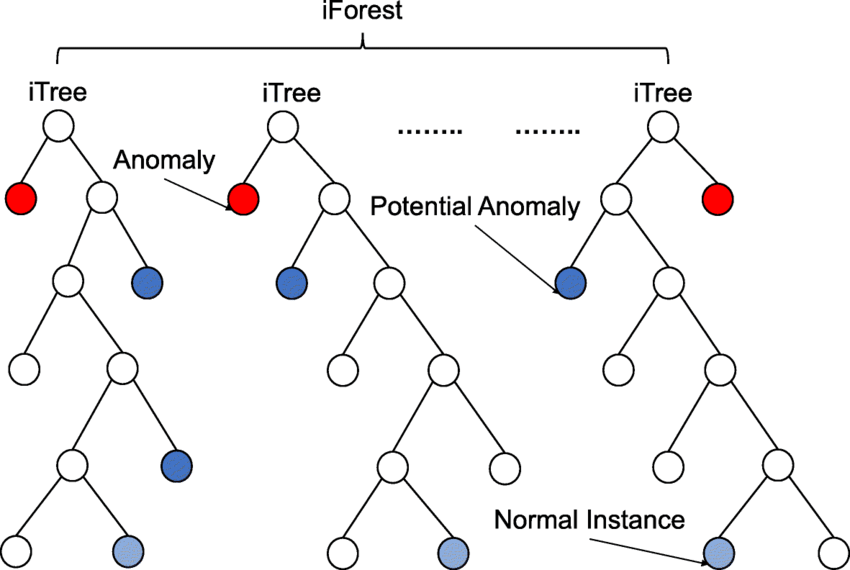

In [20]:
from sklearn.ensemble import IsolationForest

df5 = df.copy()
df5 = df5.drop(['Class'], axis=1)

**Número de estimadores**: n_estimators se refiere al número de estimadores base o árboles en el conjunto (el número de árboles que se construirán en el bosque). Es un parámetro entero opcional. El valor predeterminado es 100.

**Muestras máximas**: max_samples es el número de muestras que se tomarán para entrenar cada estimador base. El valor predeterminado de max_samples es 'auto' (256): Si max_samples es mayor que el número de muestras proporcionadas, se usarán todas las muestras para todos los árboles (sin muestreo).

**Contaminación**: se refiere a la proporción esperada de valores atípicos en el conjunto de datos (es decir, la proporción de valores atípicos en el conjunto de datos). Se utiliza al ajustar para definir el umbral en las puntuaciones de las muestras. El valor predeterminado es 'auto'. Si es ‘auto’, el valor umbral se determinará como en el artículo original de Isolation Forest. Si es float, la contaminación debe estar en el rango (0, 0.5].

**Características máximas**: No todos los estimadores base se entrenan con todas las características disponibles en el conjunto de datos. Es el número de características a seleccionar del total de características para entrenar cada estimador base o árbol. El valor predeterminado de características máximas es 1.

In [21]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df5)

IsolationForest(contamination=0.1, n_estimators=150)

### Añadiendo las columnas de puntuaciones y anomalía
Estas columnas se van a añadir al DataFrame df.

Un valor negativo "-1" en la columna de anomalía indica la presencia de una anomalía. Un valor de "1" para la anomalía representa un dato normal.

In [22]:
scores=model.decision_function(df5)
anomaly=model.predict(df5)

df5['scores']=scores
df5['anomaly']=anomaly

df5.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.074159,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.094637,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.016299,-1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.060298,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.070313,1
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.088619,1
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.092125,1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.022014,-1
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.061230,1
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.083252,1


In [23]:
anomaly = df5.loc[df5['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 28481


In [24]:
df5[df5['anomaly']==-1].head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.016299,-1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.022014,-1
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,-0.065011,-1
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,-0.043679,-1
69,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,...,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00,-0.014819,-1
82,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,-0.092505,-1
83,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,...,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,-0.048101,-1
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,-0.044340,-1
89,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,...,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,-0.037142,-1
102,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,0.127497,...,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,-0.018056,-1


In [25]:
# dropping outliers
df_out5 = df5.drop(anomaly_index, axis = 0).reset_index(drop=True)

In [26]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using modified z-score\n', size = 18)

axes[0,0].hist(df_out5['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].axvline(np.median(df_out5['V17']), ls=':', c='g', label="Median")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out5['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].axvline(np.median(df_out5['V10']), ls=':', c='g', label="Median")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out5['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].axvline(np.median(df_out5['V12']), ls=':', c='g', label="Median")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out5['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out5['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out5['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out5['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out5['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out5['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [27]:
df6 = df.copy()
df6 = df6.drop(['Class'], axis=1)

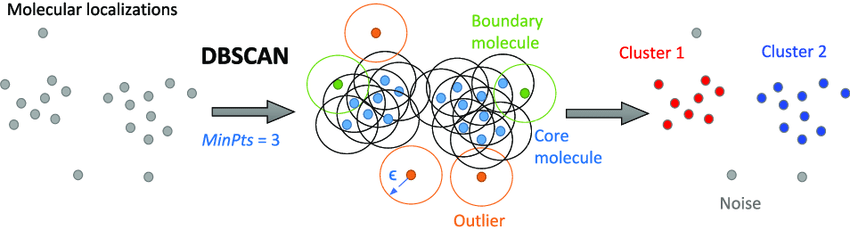

Primero ejecutemos DBSCAN sin optimización de parámetros y veamos los resultados.

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# scale data first
X = StandardScaler().fit_transform(df6.values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [29]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

The number of clusters in dataset is: 39


El número de clústeres no incluye los valores atípicos/ruido en el conjunto de datos.

Las etiquetas son las etiquetas de los clústeres. Si la etiqueta es -1, entonces la observación es un valor atípico/ruido.

In [30]:
pd.Series(labels).value_counts()

 0     197235
 1      32473
-1      20243
 9      16078
 2      12290
 5       2047
 7       1416
 10       828
 3        333
 24       287
 12       214
 16       213
 13       206
 17       181
 11       170
 18        81
 4         80
 30        48
 37        36
 20        32
 22        32
 23        25
 31        24
 14        21
 29        20
 15        19
 25        18
 28        17
 26        16
 33        16
 21        15
 32        14
 34        12
 35        12
 38        10
 6         10
 8         10
 36        10
 19         8
 27         7
Name: count, dtype: int64